## Wine_Quality_Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
sub = pd.read_csv('./data/sample_submission.csv')

In [3]:
train.shape, test.shape, sub.shape

((5497, 14), (1000, 13), (1000, 2))

In [4]:
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [10]:
train['type'].value_counts()

white    4159
red      1338
Name: type, dtype: int64

In [12]:
train['quality'].value_counts()

6    2416
5    1788
7     924
4     186
8     152
3      26
9       5
Name: quality, dtype: int64

In [14]:
test.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white


In [16]:
test['quality'] = 0
test

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,0,9.0,0.31,0.48,6.60,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white,0
1,1,13.3,0.43,0.58,1.90,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red,0
2,2,6.5,0.28,0.27,5.20,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white,0
3,3,7.2,0.15,0.39,1.80,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white,0
4,4,6.8,0.26,0.26,2.00,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,7.1,0.59,0.02,2.30,0.082,24.0,94.0,0.99744,3.55,0.53,9.7,red,0
996,996,8.7,0.15,0.30,1.60,0.046,29.0,130.0,0.99420,3.22,0.38,9.8,white,0
997,997,8.8,0.66,0.26,1.70,0.074,4.0,23.0,0.99710,3.15,0.74,9.2,red,0
998,998,7.0,0.42,0.19,2.30,0.071,18.0,36.0,0.99476,3.39,0.56,10.9,red,0


In [17]:
all_dat = pd.concat( [train, test], axis=0) # 행으로 붙이기
print(all_dat.shape)

(6497, 14)


In [18]:
all_dat.type.value_counts()

white    4898
red      1599
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

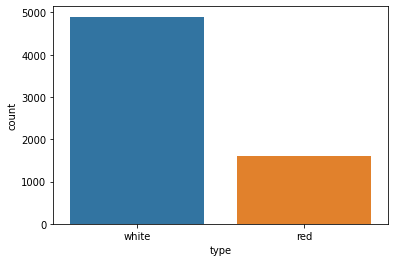

In [19]:
sns.countplot(x='type', data=all_dat)

In [20]:
all_dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 6497 non-null   int64  
 1   quality               6497 non-null   int64  
 2   fixed acidity         6497 non-null   float64
 3   volatile acidity      6497 non-null   float64
 4   citric acid           6497 non-null   float64
 5   residual sugar        6497 non-null   float64
 6   chlorides             6497 non-null   float64
 7   free sulfur dioxide   6497 non-null   float64
 8   total sulfur dioxide  6497 non-null   float64
 9   density               6497 non-null   float64
 10  pH                    6497 non-null   float64
 11  sulphates             6497 non-null   float64
 12  alcohol               6497 non-null   float64
 13  type                  6497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 761.4+ KB


In [21]:
### 데이터 전처리
## all_dat, loc[ 행조건, 열조건] -> 타겟값은 라벨링 안해도 되니 사용 안함.
## pd.get_dummies( 배열 )

X_dummy = pd.get_dummies(all_dat['type'])
X_dummy


,red,white
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1
...,...,...
995,1,0
996,0,1
997,1,0
998,1,0


In [22]:
all_dat_n = pd.concat( [all_dat, X_dummy], axis=1)  # 열로 붙이기
all_dat_n

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,red,white
0,0,5,5.6,0.695,0.06,6.80,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white,0,1
1,1,5,8.8,0.610,0.14,2.40,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red,1,0
2,2,5,7.9,0.210,0.39,2.00,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white,0,1
3,3,6,7.0,0.210,0.31,6.00,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white,0,1
4,4,6,7.8,0.400,0.26,9.50,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,0,7.1,0.590,0.02,2.30,0.082,24.0,94.0,0.99744,3.55,0.53,9.7,red,1,0
996,996,0,8.7,0.150,0.30,1.60,0.046,29.0,130.0,0.99420,3.22,0.38,9.8,white,0,1
997,997,0,8.8,0.660,0.26,1.70,0.074,4.0,23.0,0.99710,3.15,0.74,9.2,red,1,0
998,998,0,7.0,0.420,0.19,2.30,0.071,18.0,36.0,0.99476,3.39,0.56,10.9,red,1,0


In [23]:
all_dat_n = all_dat_n.drop('type', axis=1)
all_dat_n

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,red,white
0,0,5,5.6,0.695,0.06,6.80,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,0,1
1,1,5,8.8,0.610,0.14,2.40,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,1,0
2,2,5,7.9,0.210,0.39,2.00,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,0,1
3,3,6,7.0,0.210,0.31,6.00,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,0,1
4,4,6,7.8,0.400,0.26,9.50,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,0,7.1,0.590,0.02,2.30,0.082,24.0,94.0,0.99744,3.55,0.53,9.7,1,0
996,996,0,8.7,0.150,0.30,1.60,0.046,29.0,130.0,0.99420,3.22,0.38,9.8,0,1
997,997,0,8.8,0.660,0.26,1.70,0.074,4.0,23.0,0.99710,3.15,0.74,9.2,1,0
998,998,0,7.0,0.420,0.19,2.30,0.071,18.0,36.0,0.99476,3.39,0.56,10.9,1,0


In [28]:
train_n = all_dat_n.loc[ all_dat_n['quality'] != 0, : ]
test_n = all_dat_n.loc[ all_dat_n['quality'] == 0, : ]

print(train_n.shape, test_n.shape)

(5497, 15) (1000, 15)


In [77]:
X = train_n.drop( ['quality'], axis=1 )
y = train_n['quality']

test_X = test_n.drop(['quality'], axis=1)

In [78]:
print(X.shape, y.shape, test_X.shape)

(5497, 14) (5497,) (1000, 14)


#### 주어진 데이터를 학습용/자체평가용 데이터로 분리

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   stratify=y,
                                                   random_state=66)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4122, 14) (1375, 14) (4122,) (1375,)


#### 모델 구축

In [81]:
from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier(random_state=66).fit(X_train, y_train)
print("학습용 데이터 : ", model_gb.score(X_train, y_train))
print("테스트용 데이터 : ", model_gb.score(X_test, y_test))

학습용 데이터 :  0.7219796215429404
테스트용 데이터 :  0.5723636363636364


In [82]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=66).fit(X_train, y_train)
print("학습용 데이터 : ", model_rf.score(X_train, y_train))
print("테스트용 데이터 : ", model_rf.score(X_test, y_test))

학습용 데이터 :  1.0
테스트용 데이터 :  0.6647272727272727


In [83]:
from sklearn.linear_model import LogisticRegression

model_log = LogisticRegression(random_state=66).fit(X_train, y_train)
print("학습용 데이터 : ", model_log.score(X_train, y_train))
print("테스트용 데이터 : ", model_log.score(X_test, y_test))

학습용 데이터 :  0.44614264919941776
테스트용 데이터 :  0.4370909090909091


#### 교차 검증으로 모델 구축 및 평가

In [84]:
from sklearn.model_selection import cross_val_score

In [86]:
score = cross_val_score(model_gb, X_train, y_train, cv=5)
print("GradientBoostingClassifier Score: ", np.mean(score) )

GradientBoostingClassifier Score:  0.574972639011474


In [87]:
score = cross_val_score(model_rf, X_train, y_train, cv=5)
print("RandomForestClassifier Score: ", np.mean(score) )

RandomForestClassifier Score:  0.6487219770520742


In [88]:
score = cross_val_score(model_log, X_train, y_train, cv=5)
print("LogisticRegression Score: ", np.mean(score) )

LogisticRegression Score:  0.43982994998528974


### test 데이터 예측

In [89]:
pred = model_rf.predict(test_X)

### 제출 파일 생성

In [90]:
sub['quality'] = pred

In [91]:
sub

,index,quality
0,0,5
1,1,6
2,2,6
3,3,5
4,4,6
...,...,...
995,995,5
996,996,6
997,997,5
998,998,6


In [92]:
### csv 파일로 저장

sub.to_csv("baseline.csv", index=False)